<a href="https://colab.research.google.com/github/AndresChavez123/Sys2025-2/blob/main/Copia_de_PROYECTO_FINAL_GIGA_SCIENCE_EEGMI_GCPDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
dggarciam94_giga_science_gcpds_path = kagglehub.dataset_download('dggarciam94/giga-science-gcpds')

print('Data source import complete.')


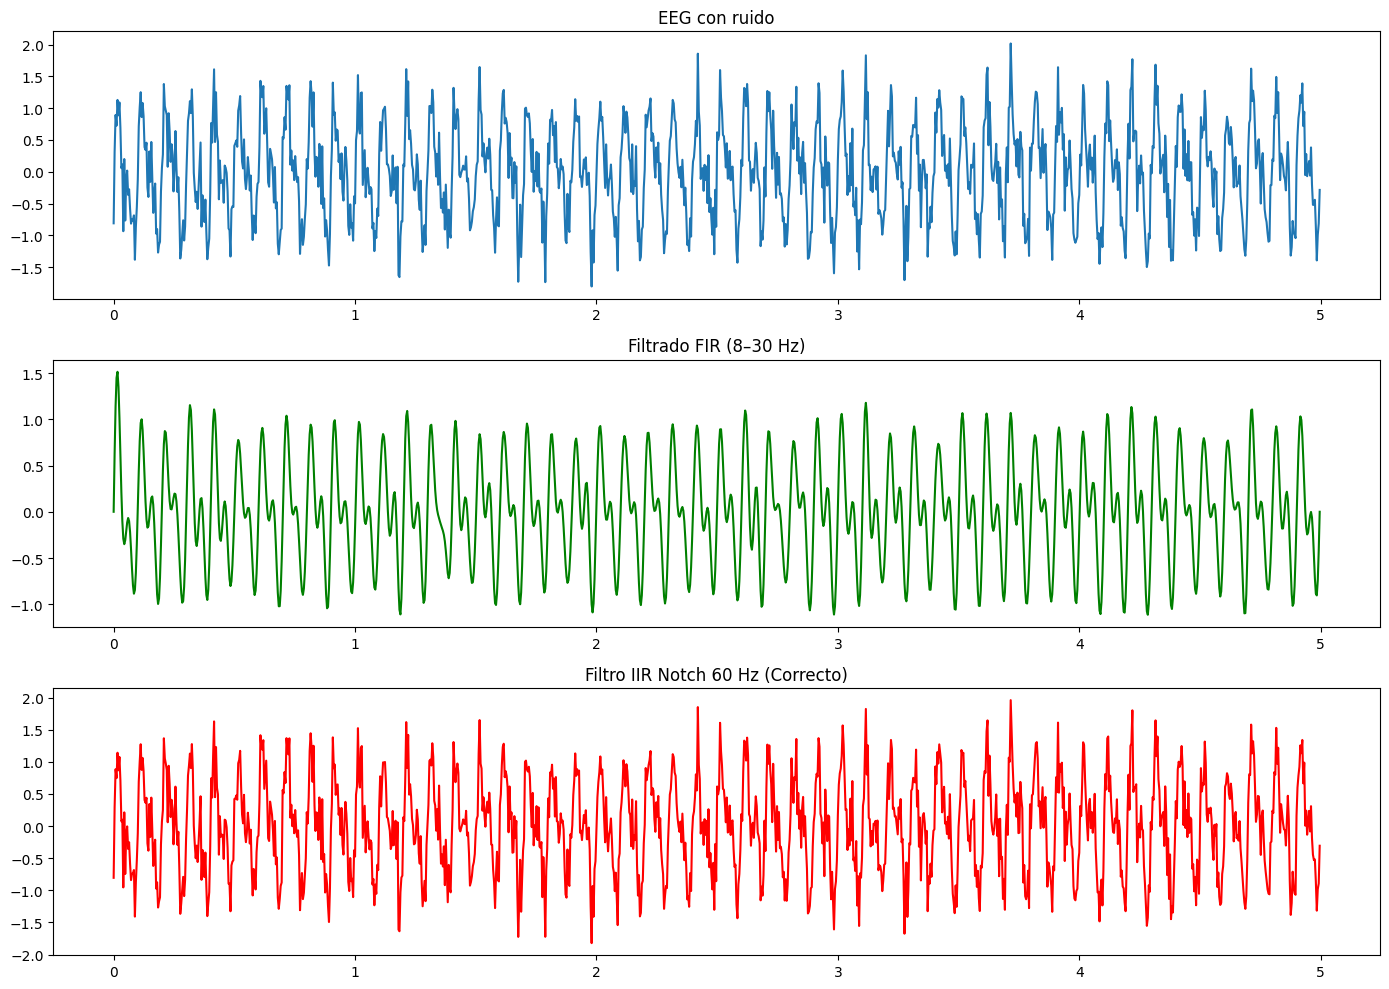

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, firwin

# ----------------------------------------------------
# 1. Señal tipo EEG simulada
# ----------------------------------------------------
fs = 250                     # frecuencia de muestreo típica EEG
t = np.arange(0, 5, 1/fs)

# señal EEG mu (10 Hz) + beta (20 Hz)
eeg = 0.8*np.sin(2*np.pi*10*t) + 0.5*np.sin(2*np.pi*20*t)
# ruido blanco
ruido = 0.3*np.random.randn(len(t))
eeg_ruidosa = eeg + ruido

# ----------------------------------------------------
# 2. FIR pasa banda 8–30 Hz (mu y beta)
# ----------------------------------------------------
lowcut = 8
highcut = 30
orden_fir = 101

fir_coef = firwin(orden_fir, [lowcut, highcut], fs=fs, pass_zero=False)
eeg_fir = filtfilt(fir_coef, [1], eeg_ruidosa)

# ----------------------------------------------------
# 3. IIR NOTCH 60 Hz CORRECTO
# ----------------------------------------------------
notch_freq = 60                # frecuencia a eliminar
bw = 1                         # ancho de banda del notch (estrecho)
low = (notch_freq - bw/2) / (fs/2)
high = (notch_freq + bw/2) / (fs/2)

# diseño del notch bandstop
b_notch, a_notch = butter(2, [low, high], btype='bandstop')

eeg_iir = filtfilt(b_notch, a_notch, eeg_ruidosa)

# ----------------------------------------------------
# 4. Graficar
# ----------------------------------------------------
plt.figure(figsize=(14,10))

plt.subplot(3,1,1)
plt.plot(t, eeg_ruidosa)
plt.title("EEG con ruido")

plt.subplot(3,1,2)
plt.plot(t, eeg_fir, color='green')
plt.title("Filtrado FIR (8–30 Hz)")

plt.subplot(3,1,3)
plt.plot(t, eeg_iir, color='red')
plt.title("Filtro IIR Notch 60 Hz (Correcto)")

plt.tight_layout()
plt.show()


Los filtros digitales se analizan mediante la Transformada Z, que permite expresar
un sistema como H(z) = Y(z)/X(z). Según su estructura, los filtros pueden ser FIR
(Finite Impulse Response) o IIR (Infinite Impulse Response). Ambos se usan en EEG
para resaltar patrones temporales, espectrales y espaciales en tareas de Imaginación
Motora (MI).

FILTRO FIR:
- No usa retroalimentación.
- Siempre estable.
- Puede diseñarse con fase lineal.
- Ideal para EEG porque conserva la forma de ondas (mu 8–12 Hz y beta 13–30 Hz).

FILTRO IIR:
- Usa retroalimentación.
- Más eficiente (menos coeficientes).
- No tiene fase lineal, pero es útil para eliminar ruido (notch 50/60 Hz).

Aplicación en EEG MI:
- Resaltan las bandas mu y beta, donde aparecen los patrones ERD/ERS.
- FIR pasa banda para extraer actividad sensorimotora.
- IIR notch o pasa banda para eliminar ruido o resaltar zonas específicas.
- Ayudan a resaltar patrones temporales (cambios en energía), espectrales
  (mu/beta) y espaciales (electrodos C3, C4).

En resumen:
Los FIR son ideales para análisis fino de EEG y los IIR para filtrado rápido
y eliminación de ruido. Juntos permiten mejorar la detección de señales de MI.


Este código simula una señal EEG, le agrega ruido y aplica dos filtros digitales
(FIR e IIR) para observar cómo cambian los patrones temporales y espectrales de la señal.

1. Simulación de EEG:
   Se genera una señal con componentes mu (10 Hz) y beta (20 Hz), que son frecuencias
   asociadas a la imaginación motora (MI). Luego se añade ruido para imitar un EEG real.

2. Filtro FIR (8–30 Hz):
   Es un filtro pasa banda que deja pasar únicamente la actividad mu y beta.
   Sirve para resaltar patrones relacionados con MI y eliminar frecuencias que no aportan información.

3. Filtro IIR Notch (60 Hz):
   Es un filtro elimina-banda que suprime el ruido eléctrico de 60 Hz.
   Se usa para limpiar interferencia sin afectar el resto de la señal.

4. Gráficas:
   - La primera gráfica muestra la señal EEG con ruido.
   - La segunda gráfica muestra la señal filtrada con FIR, donde se resaltan mu y beta de forma más clara.
   - La tercera gráfica muestra la señal filtrada con el notch IIR, eliminando la interferencia de 60 Hz.

En conjunto, el código evidencia cómo los filtros digitales ayudan a limpiar y resaltar
información relevante en señales EEG para el análisis de patrones de imaginación motora.


# Proyecto Final Señales y Sistemas 2025 -2
Integrantes:
- Andres Mauricio Chavez Ceron
- Alexis Andres Valencia Cumbal
- Anderson Jhovanny Tapie Chinguad
## **Objetivo**: Implementar técnicas de representación en tiempo y frecuencia para el reconocimiento de señales de electroencefalografía (EEG) en tareas de imaginación motora (Motor Imagery)


![eegMI](https://figures.semanticscholar.org/288a54f091264377eccc99a19079c9387d66a78f/3-Figure2-1.png)

Las señales de EEG pueden ser ruidosas debido a diversas fuentes, incluidos artefactos fisiológicos e interferencias electromagnéticas. También pueden variar de persona a persona, lo que dificulta la extracción de características y la comprensión de las señales. Además, esta variabilidad, influenciada por factores genéticos y cognitivos, presenta desafíos para el desarrollo de soluciones independientes del sujeto.

**Base de datos**: GiGaScience Database [https://gigadb.org/dataset/100295](https://gigadb.org/dataset/100295)

Ver Sección 3.1 en [Multimodal Explainability Using Class Activation Maps and Canonical Correlation for MI-EEG Deep Learning Classification](https://www.mdpi.com/2076-3417/14/23/11208)


## Instalamos las librerias necesarias

## Ejercicio 1
Consultar para qué sirven las siguientes librerías

In [ ]:
#!pip install tensorflow==2.15.0
!pip install mne==1.6.0
!pip install braindecode===0.7
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.databases

**solucion**

**TensorFlow:**

TensorFlow es una de las bibliotecas más populares para aprendizaje profundo (deep learning). Sirve para:

* Construir y entrenar redes neuronales artificiales.
* Manejar grandes cantidades de datos para el aprendizaje automático.
* Implementar modelos de visión por computadora, procesamiento de lenguaje natural, reconocimiento de voz, etc.
  
**mne:**
  
MNE (Magnetoencephalography & Electroencephalography) es una librería especializada en el análisis de señales cerebrales como:

* EEG (Electroencefalografía): actividad eléctrica del cerebro.
* MEG (Magnetoencefalografía): campos magnéticos producidos por la actividad cerebral.
* ECG (Electrocardiografía): actividad eléctrica del corazón.

**Braindecode:**
Braindecode es una librería basada en PyTorch y MNE, especializada en aprendizaje profundo para el análisis de señales cerebrales. Se usa para:

* Clasificación de EEG en tareas de BCI (Interfaz Cerebro-Computadora).
* Extracción de características de señales cerebrales.
* Aplicaciones médicas y neurocientíficas.

**git+https://github.com/UN-GCPDS/python-gcpds.databases:**
  
Este paquete proviene del Grupo de Procesamiento de Señales de la Universidad de Navarra (GCPDS) y parece estar relacionado con bases de datos para señales biomédicas.

Al instalarlo desde GitHub, indica que el paquete está en desarrollo y proporciona acceso a:

* Bases de datos de EEG/MEG para experimentos en neurociencia.
* Herramientas para manejar y procesar señales biomédicas.

**Concluciones:**

* tensorflow: Para redes neuronales y aprendizaje profundo.
* mne: Para análisis de señales cerebrales EEG/MEG/ECG.
* braindecode: Para deep learning en neurociencia.
* gcpds.databases: Para acceder a bases de datos biomédicas.


## Importamos algunas librerias necesarias

In [ ]:
from scipy.signal import resample
from scipy.signal import freqz, filtfilt, resample
from scipy.signal import butter as bw
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
from gcpds.databases import GIGA_MI_ME
from sklearn.base import BaseEstimator, TransformerMixin

* resample: Cambia la frecuencia de muestreo de una señal.
* freqz: Muestra la respuesta en frecuencia de un filtro digital.
* filtfilt:Filtra una señal sin distorsión de fase (usa filtrado hacia adelante y hacia atrás).
* butter as bw:Diseña un filtro de Butterworth (ideal para señales EEG).

**Usos en EEG: Filtrado de señales, eliminación de ruido, re-muestreo de señales para análisis en distintas bandas de frecuencia.**
  
**pandas (Manejo de datos)**
Pandas es una de las librerías más utilizadas en manipulación y análisis de datos.

* Se usa para leer archivos CSV, estructurar datos en dataframes y realizar operaciones sobre ellos.
* Usos en EEG: Almacenar señales, etiquetas de clase (izquierda/derecha en BCI), tiempos de eventos.

**random (Generación de números aleatorios)**
* Módulo para generar números aleatorios en Python.
* Usos en EEG: Creación de conjuntos de entrenamiento/test, generación de ruido simulado.

**numpy (Cálculo numérico y manipulación de matrices)**
* NumPy es una librería optimizada para cálculos numéricos con matrices y vectores.
* Usos en EEG: Almacenamiento de señales, cálculos matemáticos en procesamiento de datos.

 **matplotlib.pyplot (Visualización de datos)**
* Matplotlib permite crear gráficos y visualizar datos.
* Usos en EEG: Graficar señales EEG, visualizar espectros de frecuencia.

**tensorflow (Desactivado en tu código)**
TensorFlow se usa para aprendizaje profundo, pero está comentado en tu código. Se usa en clasificación de señales cerebrales con redes neuronales.

*  Usos en EEG: Modelos de aprendizaje profundo para detección de patrones en señales.






## Funciones necesarias para el preprocesamiento leve de los datos

In [ ]:
def load_GIGA(db,
              sbj,
              eeg_ch_names,
              new_fs,
              fs,
              f_bank=None,
              vwt=None,
              run=None):

    index_eeg_chs = db.format_channels_selectors(channels = eeg_ch_names) - 1

    #tf_repr = TimeFrequencyRpr(sfreq = fs, f_bank = f_bank, vwt = vwt)

    db.load_subject(sbj)
    if run == None:
        X, y = db.get_data(classes = ['left hand mi', 'right hand mi']) #Load MI classes, all channels {EEG}, reject bad trials, uV
    else:
        X, y = db.get_run(run, classes = ['left hand mi', 'right hand mi']) #Load MI classes, all channels {EEG}, reject bad trials, uV
    X = X[:, index_eeg_chs, :] #spatial rearrangement
    #X = np.squeeze(tf_repr.transform(X))
    #Resampling
    if new_fs == fs:
        pass#print('No resampling, since new sampling rate same.')
    else:
        print("Resampling from {:f} to {:f} Hz.".format(fs, new_fs))
        X = resample(X, int((X.shape[-1]/fs)*new_fs), axis = -1)

    return X, y

def butterworth_digital_filter(X, N, Wn, btype, fs, axis=-1, padtype=None, padlen=0, method='pad', irlen=None):
  """
  Apply digital butterworth filter
  INPUT
  ------
  1. X: (D array)
    array with signals.
  2. N: (int+)
    The order of the filter.
  3. Wn: (float+ or 1D array)
    The critical frequency or frequencies. For lowpass and highpass filters, Wn is a scalar; for bandpass and bandstop filters, Wn is a length-2 vector.
    For a Butterworth filter, this is the point at which the gain drops to 1/sqrt(2) that of the passband (the “-3 dB point”).
    If fs is not specified, Wn units are normalized from 0 to 1, where 1 is the Nyquist frequency (Wn is thus in half cycles / sample and defined as 2*critical frequencies / fs). If fs is specified, Wn is in the same units as fs.
  4. btype: (str) {‘lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’}
    The type of filter
  5. fs: (float+)
    The sampling frequency of the digital system.
  6. axis: (int), Default=1.
    The axis of x to which the filter is applied.
  7. padtype: (str) or None, {'odd', 'even', 'constant'}
    This determines the type of extension to use for the padded signal to which the filter is applied. If padtype is None, no padding is used. The default is ‘odd’.
  8. padlen: (int+) or None, Default=0
    The number of elements by which to extend x at both ends of axis before applying the filter. This value must be less than x.shape[axis] - 1. padlen=0 implies no padding.
  9. method: (str), {'pad', 'gust'}
    Determines the method for handling the edges of the signal, either “pad” or “gust”. When method is “pad”, the signal is padded; the type of padding is determined by padtype
    and padlen, and irlen is ignored. When method is “gust”, Gustafsson’s method is used, and padtype and padlen are ignored.
  10. irlen: (int) or None, Default=nONE
    When method is “gust”, irlen specifies the length of the impulse response of the filter. If irlen is None, no part of the impulse response is ignored.
    For a long signal, specifying irlen can significantly improve the performance of the filter.
  OUTPUT
  ------
  X_fil: (D array)
    array with filtered signals.
  """
  b, a = bw(N, Wn, btype, analog=False, output='ba', fs=fs)
  return filtfilt(b, a, X, axis=axis, padtype=padtype, padlen=padlen, method=method, irlen=irlen)

class TimeFrequencyRpr(BaseEstimator, TransformerMixin):
  """
  Time frequency representation of EEG signals.

  Parameters
  ----------
    1. sfreq:  (float) Sampling frequency in Hz.
    2. f_bank: (2D array) Filter banks Frequencies. Default=None
    3. vwt:    (2D array) Interest time windows. Default=None
  Methods
  -------
    1. fit(X, y=None)
    2. transform(X, y=None)
  """
  def __init__(self, sfreq, f_bank=None, vwt=None):
    self.sfreq = sfreq
    self.f_bank = f_bank
    self.vwt = vwt
# ------------------------------------------------------------------------------

  def _validation_param(self):
    """
    Validate Time-Frequency characterization parameters.
    INPUT
    -----
      1. self
    ------
      2. None
    """
    if self.sfreq <= 0:
      raise ValueError('Non negative sampling frequency is accepted')


    if self.f_bank is None:
      self.flag_f_bank = False
    elif self.f_bank.ndim != 2:
      raise ValueError('Band frequencies have to be a 2D array')
    else:
      self.flag_f_bank = True

    if self.vwt is None:
      self.flag_vwt = False
    elif self.vwt.ndim != 2:
      raise ValueError('Time windows have to be a 2D array')
    else:
      self.flag_vwt = True

# ------------------------------------------------------------------------------
  def _filter_bank(self, X):
    """
    Filter bank Characterization.
    INPUT
    -----
      1. X: (3D array) set of EEG signals, shape (trials, channels, time_samples)
    OUTPUT
    ------
      1. X_f: (4D array) set of filtered EEG signals, shape (trials, channels, time_samples, frequency_bands)
    """
    X_f = np.zeros((X.shape[0], X.shape[1], X.shape[2], self.f_bank.shape[0])) #epochs, Ch, Time, bands
    for f in np.arange(self.f_bank.shape[0]):
      X_f[:,:,:,f] = butterworth_digital_filter(X, N=5, Wn=self.f_bank[f], btype='bandpass', fs=self.sfreq)
    return X_f

# ------------------------------------------------------------------------------
  def _sliding_windows(self, X):
    """
    Sliding Windows Characterization.
    INPUT
    -----
      1. X: (3D array) set of EEG signals, shape (trials, channels, time_samples)
    OUTPUT
    ------
      1. X_w: (4D array) shape (trials, channels, window_time_samples, number_of_windows)
    """
    window_lenght = int(self.sfreq*self.vwt[0,1] - self.sfreq*self.vwt[0,0])
    X_w = np.zeros((X.shape[0], X.shape[1], window_lenght, self.vwt.shape[0]))
    for w in np.arange(self.vwt.shape[0]):
        X_w[:,:,:,w] = X[:,:,int(self.sfreq*self.vwt[w,0]):int(self.sfreq*self.vwt[w,1])]
    return X_w

# ------------------------------------------------------------------------------
  def fit(self, X, y=None):
    """
    fit.
    INPUT
    -----
      1. X: (3D array) set of EEG signals, shape (trials, channels, time_samples)
      2. y: (1D array) target labels. Default=None
    OUTPUT
    ------
      1. None
    """
    pass

# ------------------------------------------------------------------------------
  def transform(self, X, y=None):
    """
    Time frequency representation of EEG signals.
    INPUT
    -----
      1. X: (3D array) set of EEG signals, shape (trials, channels, times)
    OUTPUT
    ------
      1. X_wf: (5D array) Time-frequency representation of EEG signals, shape (trials, channels, window_time_samples, number_of_windows, frequency_bands)
    """
    self._validation_param()     #Validate sfreq, f_freq, vwt

    #Avoid edge effects of digital filter, 1st:fbk, 2th:vwt
    if self.flag_f_bank:
        X_f = self._filter_bank(X)
    else:
        X_f = X[:,:,:,np.newaxis]

    if self.flag_vwt:
      X_wf = []
      for f in range(X_f.shape[3]):
        X_wf.append(self._sliding_windows(X_f[:,:,:,f]))
      X_wf = np.stack(X_wf, axis=-1)
    else:
      X_wf = X_f[:,:,:,np.newaxis,:]

    return X_wf

#plot eeg
def plot_eeg(X,tv,ax,channels,esp=2,title=None):
    # X in CH x Samples
    n_canales = X.shape[0]

    for ch in range(n_canales): # canales
            xx = X[ch]
            xx = xx - np.mean(xx)
            xx = xx/np.max(abs(xx))
            ax.plot(tv, xx +(ch * esp), label=channels[ch])  # Desplazamos cada canal para visualización
    ax.set_yticks(range(0, esp * n_canales, esp), channels)  # Etiquetas en el eje Y
    ax.set_xlabel("Tiempo [s]")
    ax.set_ylabel("Canales EEG [$\mu$V]")
    ax.set_title(title)
    ax.grid(True)
    ax.set_xlim([min(tv)-0.01,max(tv)+0.01])
    ax.set_ylim([-esp,n_canales*esp+0.01])







## Establecemos el protocolo de pruebas y la configuración del montaje EEG

Describir el protocolo de captura de datos y el montaje utilizado


![mi](https://www.mdpi.com/diagnostics/diagnostics-13-01122/article_deploy/html/images/diagnostics-13-01122-g001.png)
![montaje](https://www.mdpi.com/applsci/applsci-14-11208/article_deploy/html/images/applsci-14-11208-g001.png)

In [ ]:
channels = ['Fp1','Fpz','Fp2',
            'AF7','AF3','AFz','AF4','AF8',
            'F7','F5','F3','F1','Fz','F2','F4','F6','F8',
            'FT7','FC5','FC3','FC1','FCz','FC2','FC4','FC6','FT8',
            'T7','C5','C3','C1','Cz','C2','C4','C6','T8',
            'TP7','CP5','CP3','CP1','CPz','CP2','CP4','CP6','TP8',
            'P9','P7','P5','P3','P1','Pz','P2','P4','P6','P8','P10',
            'PO7','PO3','POz','PO4','PO8',
            'O1','Oz','O2',
            'Iz']

areas = {
    'Frontal': ['Fpz', 'AFz', 'Fz', 'FCz'],
    'Frontal Right': ['Fp2','AF4','AF8','F2','F4','F6','F8',],
    'Central Right': ['FC2','FC4','FC6','FT8','C2','C4','C6','T8','CP2','CP4','CP6','TP8',],
    'Posterior Right': ['P2','P4','P6','P8','P10','PO4','PO8','O2',],
    #'Central': ['Cz'],
    'Posterior': ['CPz','Pz', 'Cz','POz','Oz','Iz',],
    'Posterior Left': ['P1','P3','P5','P7','P9','PO3','PO7','O1',],
    'Central Left': ['FC1','FC3','FC5','FT7','C1','C3','C5','T7','CP1','CP3','CP5','TP7',],
    'Frontal Left': ['Fp1','AF3','AF7','F1','F3','F5','F7',],
}

arcs = [
    #'hemispheres',
    'areas',
    'channels',
]

## Definimos la ruta y los argumentos para la carga de los datos de EEG

In [ ]:
db = GIGA_MI_ME('/kaggle/input/giga-science-gcpds/GIGA_MI_ME')
#ti = 0
#tf = 7
new_fs = 256.
load_args = dict(db = db,
                 eeg_ch_names = channels,
                 fs = db.metadata['sampling_rate'],
                 #f_bank = np.asarray([[4., 40.]]),
                 #vwt = np.asarray([[ti, tf]]), #2.5 - 5 MI
                 new_fs = new_fs)

## Cargamos los datos según el sujeto que se quiera

Si se quiere cargar los datos de todos los sujetos, aplicar un ciclo que itere la lista de sujetos y de esta forma se cargara uno por uno dependiendo lo que se desee realizar.

Por ejemplo:

for i in sbj:
    X, y = load_GIGA(sbj=sbj, **load_args)

In [ ]:
sbj = 5
X, y = load_GIGA(sbj=sbj, **load_args)

In [ ]:
print(f'X con {X.shape[0]} intentos; {X.shape[1]} canales; {X.shape[2]} muestras No. de segundos {X.shape[2]/new_fs}')

In [ ]:
X.shape

## Visualización de las señales de EEG en el tiempo

In [ ]:
#graficar canales promedio
trial = 0
ti = 0 # ti
tf = 7 # tf
tv = np.arange(ti,tf,1/new_fs)

#Señal cruda
fig,ax = plt.subplots(1,1,figsize=(8,8),sharex = True)
# Graficar cada canal en un subplot banda respectiva

plot_eeg(X[trial],tv,ax=ax,channels=channels,title='EEG original')
plt.show()

# Ejercicio 2

Discuta la gráfica anterior

**DISCUCION DE LA GRAFICA**

**Análisis de la Gráfica EEG en relación con los Ritmos Cerebrales**
La gráfica representa señales EEG multicanal en microvoltios (µV) vs. tiempo (s). Se observan múltiples trazas correspondientes a distintos electrodos ubicados en el cuero cabelludo, que registran la actividad eléctrica del cerebro.

A continuación, discutimos cómo se pueden relacionar los patrones observados con los ritmos cerebrales principales: delta, theta, alpha, beta y gamma.

*  La gráfica muestra múltiples canales EEG con oscilaciones características de la actividad cerebral.
 * Sin un análisis espectral (FFT o Wavelet), no podemos determinar con certeza qué ritmos predominan.
* Según la forma de las señales, podríamos suponer que hay actividad en los rangos de Alpha y Beta, y quizás Theta.
* Si el sujeto estaba relajado, esperaríamos Alpha; si estaba atento o realizando una tarea cognitiva, esperaríamos Beta.
* Para confirmar cada tipo de ritmo, debemos aplicar filtros de frecuencia específicos y realizar un análisis de espectro.


Nota: Discuta en qué consisten los ritmos cerebrales

![montaje](https://cdn.shopify.com/s/files/1/0348/7053/files/storage.googleapis.com-486681944373284_61cb9936-f6c2-493d-8402-3426d7f5a049_1024x1024.jpg?v=1689309340)



In [ ]:
# filtramos trials completos en ritmos cerebrales utilizando filtros IIR


f_bank = np.array([[0.5,4.],[4., 8.],[8.,13.],[13.,32.],[32.,100.]])
vwt = np.asarray([[ti, tf]]) #2.5 - 5 MI 0 - 7 trial completo
tf_repr = TimeFrequencyRpr(sfreq = new_fs, f_bank = f_bank)

Xrc = np.squeeze(tf_repr.transform(X))

Xrc.shape

# Ejercicio 3

Expliqué cómo se calcularon cada una de las 5 dimensiones del arreglo Xrc

**Solucion**

**1** primero se define la banda de frecuencias a filtrar:
Se establece un banco de filtros (f_bank) con 5 bandas de frecuencia correspondientes a los ritmos cerebrales principales:

f_bank = np.array([
    [0.5, 4.],    # Delta
    [4., 8.],     # Theta
    [8., 13.],    # Alpha
    [13., 32.],   # Beta
    [32., 100.]   # Gamma
])
estas bandas permiten separar la señal en diefrentes componentes.

**2**Definir la ventana de tiempo (vwt)
Se extrae un segmento específico de la señal EEG, por ejemplo, de 2.5 a 5 segundos para movimiento imaginado (MI) o de 0 a 7 segundos para un trial completo:

vwt = np.asarray([[ti, tf]])

**3**Aplicar la transformación de dominio tiempo-frecuencia
TimeFrequencyRpr (posiblemente basado en MNE o Braindecode) toma la señal EEG, filtra cada banda de frecuencia y genera una representación tiempo-frecuencia.

tf_repr = TimeFrequencyRpr(sfreq=new_fs, f_bank=f_bank)

**4**Transformar los datos EEG
La transformación filtra los datos y obtiene una nueva representación con las 5 dimensiones del arreglo Xrc:

Xrc = np.squeeze(tf_repr.transform(X))

**Relación con el Procesamiento de EEG**
Cada una de estas dimensiones tiene una utilidad específica en el análisis EEG:

* Separar ensayos EEG (dim 1) → Para analizar respuestas en diferentes sujetos o repeticiones.
* Filtrar por electrodos (dim 2) → Permite identificar actividad en diferentes regiones del cerebro.
* Separar bandas de frecuencia (dim 3) → Analiza cómo los ritmos cerebrales cambian en el tiempo.
* Observar evolución temporal (dim 4) → Permite analizar cambios en la actividad cerebral en diferentes momentos.
* Convertir la señal a frecuencia (dim 5) → Permite aplicar algoritmos de clasificación o análisis espectral.

**Conclusiónes**
El proceso convierte la señal EEG en una representación tiempo-frecuencia multibanda, donde:

* Cada ensayo EEG se divide en canales.
* Cada canal se filtra en 5 bandas de frecuencia (ritmos cerebrales).
* Cada banda se transforma en coeficientes tiempo-frecuencia.


In [ ]:
import matplotlib.pyplot as plt

ritmo = ['delta','theta','alpha','beta','gamma']
trial = 0
n_trials, n_canales, n_muestras, n_bands = Xrc.shape  # Simulación de datos

esp = 2 #espaciado canales
fig,ax = plt.subplots(5,1,figsize=(8,40))
# Graficar cada canal en un subplot banda respectiva
for b in range(f_bank.shape[0]): #bandas
    plot_eeg(Xrc[trial,:,:,b],tv,ax=ax[b],channels=channels,title=f'EEG Filtrado {f_bank[b,0]}-{f_bank[b,1]} [Hz] -- Ritmo: {ritmo[b]}')
plt.show()

## Visualización de las señales de EEG en la frecuencia

In [ ]:
#señal orignal
Xwo = np.fft.rfft(X,axis=-1)
vfreq = np.fft.rfftfreq(X.shape[2],1/new_fs)

Xwo.shape
plt.plot(vfreq,20*np.log10(np.abs(Xwo[trial])).T)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.title('Eespectro Señal EEG original')
plt.show()


## Ejercicio 4

Discuta la gráfica anterior

**Solucion**

La gráfica muestra el espectro de frecuencia de varias señales EEG, mostrando cómo la energía de cada una de las señales se distribuye en diferentes frecuencias. Se observa la magnitud en decibeles (dB) vs. frecuencia en Hertz (Hz).

**1** **Descripción General de la Gráfica**
* Eje X (Frecuencia en Hz): Representa la frecuencia de la señal EEG, cubriendo un rango aproximado de 0 a 125 Hz.
* Eje Y (Magnitud en dB): Indica la intensidad de la señal en cada frecuencia.
* Múltiples colores: Pueden representar diferentes canales EEG o múltiples ensayos (trials).

**2. Características Notables en la Gráfica**
a) Predominio de Energía en Frecuencias Bajas (0-20 Hz)
Se observa un pico de alta energía en frecuencias bajas (cercanas a 0 Hz), lo que es típico en señales EEG.
La mayor parte de la actividad EEG se concentra en el rango 0-20 Hz, lo que concuerda con la presencia de ritmos cerebrales como:

* Delta (0.5-4 Hz) → Relacionado con sueño profundo.
* Theta (4-8 Hz) → Asociado con relajación y somnolencia.
* Alpha (8-13 Hz) → Presente en estados de calma y ojos cerrados.
* Beta (13-30 Hz) → Relacionado con actividad mental y concentración.

Este patrón es esperado en EEG, ya que la actividad cerebral relevante ocurre principalmente en frecuencias bajas.

**b) Presencia de Ruido en Frecuencias Altas (>30 Hz)**
A partir de 30 Hz, la magnitud disminuye, pero sigue habiendo bastante ruido.
Este rango incluye ondas Gamma (30-100 Hz), que están asociadas con procesamiento cognitivo avanzado.
Sin embargo, la dispersión de energía en frecuencias altas sugiere la presencia de ruido electromagnético o muscular.

El EEG es sensible a interferencias, y el ruido de alta frecuencia puede deberse a:

* Ruido muscular (EMG): Movimientos faciales, parpadeos.
* Interferencias de red eléctrica (50/60 Hz): Se observa un pico alrededor de 60 Hz, lo que sugiere interferencia.
* Artefactos electrónicos: Equipos en el entorno pueden introducir ruido en estas frecuencias.

**3. Mejoras Posibles en el Procesamiento de la Señal EEG**
Para mejorar la calidad de la señal y eliminar el ruido, se pueden aplicar técnicas de procesamiento:

* Filtrado Paso Bajo (<40 Hz):

Ayudaría a eliminar el ruido de alta frecuencia y aislar los ritmos cerebrales más relevantes.

* Filtrado Notch en 60 Hz:

Útil para eliminar interferencia de la red eléctrica.

* Filtrado de Bandas Específicas (IIR o FIR):

Permitiría aislar ritmos específicos (Delta, Theta, Alpha, Beta, Gamma).

* Análisis Tiempo-Frecuencia (Wavelet Transform o STFT):

Mejoraría la interpretación al permitir analizar cómo cambian las frecuencias en el tiempo.

In [ ]:
#espectro señales filtradas
Xwb = np.fft.rfft(Xrc,axis=2)

Xwb.shape

In [ ]:
#espectro señales filtradas por bandas - ritmos cerebrales

fig,ax = plt.subplots(5,1,figsize=(8,40))
# Graficar cada canal en un subplot banda respectiva
for b in range(f_bank.shape[0]): #bandas
    ax[b].plot(vfreq,20*np.log10(np.abs(Xwb[trial,:,:,b])).T)
    ax[b].set_xlabel('Frecuencia [Hz]')
    ax[b].set_ylabel('Magnitud [dB]')
    ax[b].set_title(f'Esepctro EEG Filtrado {f_bank[b,0]}-{f_bank[b,1]} [Hz] -- Ritmo: {ritmo[b]}')

plt.show()

## Ejercicio 5

Discuta las gráficas

**solucion**

Las gráficas muestran del espectro de una señal EEG después de aplicar filtros en diferentes bandas de frecuencia correspondientes a los ritmos cerebrales Delta, Theta, Alpha, Beta y Gamma. vamos a analizar cada grafico basadops en la actividad cerebral.

* Eje X (Frecuencia en Hz): Muestra el rango de frecuencias analizadas.
* Eje Y (Magnitud en dB): Representa la potencia de la señal EEG en cada frecuencia.
* Múltiples colores: Representan diferentes canales EEG o  en otro caso múltiples ensayos.
* Cada gráfico ha sido filtrado en una banda específica de frecuencia, aislando un ritmo cerebral de interes para nosotros.


**Espectro EEG Filtrado en 0.5 - 4.0 Hz (Ritmo Delta)**

* Dominancia de frecuencias muy bajas (0.5 - 4 Hz), con una caída progresiva en las frecuencias más altas.
* Alta magnitud en la banda baja, lo cual es típico de ondas Delta.
* Estas ondas son características del sueño profundo y estados inconscientes.

**Espectro EEG Filtrado en 4.0 - 8.0 Hz (Ritmo Theta)**

* Se observa un pico claro en el rango de 4-8 Hz, con una disminución progresiva hacia las frecuencias más altas.
* Este ritmo está relacionado con estados de relajación, y meditacion.
* Se observa menos energía en comparación con Delta, pero aún con una presencia significativa.

**Espectro EEG Filtrado en 8.0 - 13.0 Hz (Ritmo Alpha)**

* Aparece un pico claro en la banda Alpha (8-13 Hz).
* Las ondas Alpha son más fuertes cuando una persona está relajada pero despierta, especialmente con los ojos cerrados.
* Esta actividad suele predominar en el lóbulo occipital y parietal.
  
**Espectro EEG Filtrado en 13.0 - 32.0 Hz (Ritmo Beta)**

* Se observa un pico en la banda Beta (13-32 Hz), con alta actividad en esta región.
* Las ondas Beta están relacionadas con actividad mental, atención, concentración y procesamiento sensorial.
* La caída en frecuencias altas sugiere pérdida de energía debido al filtrado.


**Espectro EEG Filtrado en 32.0 - 100.0 Hz (Ritmo Gamma)**

* Amplia presencia de actividad en el rango Gamma (32-100 Hz).
* Se observa una distribución uniforme de energia en la banda.
* Las ondas Gamma están relacionadas con procesos cognitivos avanzados, memoria de trabajo y percepción sensorial.





## Visualización de espectrogramas

Consultar qué es la Short Time Fourier Transform



In [ ]:
#estimar stft con ventanas de nperseg puntos sobre eje temporal en EEG original
from scipy.signal import stft #
nperseg = 0.5*new_fs#longitud ventas en muestras
vfs,t,Xstft = stft(X,fs=new_fs,nperseg=nperseg,axis=2)
Xstft = 20*np.log10(abs(Xstft))

#graficar stft para un trial y un canal
trail = 0
chi = channels.index('C4')

fig, ax = plt.subplots(2, 1,figsize=(10,6))

ax[1].plot(tv,X[trail,chi,:])
ax[1].set_ylabel("Amp. [$\mu$ V]")
im = ax[0].pcolormesh(t, vfs, Xstft[trail,chi])
fig.colorbar(im, ax=ax[0],orientation="horizontal",pad=0.2)
plt.gca()
plt.xlabel('t [seg]')
plt.ylabel('f [Hz]')
ax[0].set_title(f'Esepctrograma EEG Original -- Ch = {channels[chi]}')
print(Xstft.shape)

In [ ]:
#estimar stft con ventanas de nperseg puntos sobre eje temporal en EEG original
b = 2
vfs,t,Xstftb = stft(Xrc,fs=new_fs,nperseg=nperseg,axis=2)
Xstftb = 20*np.log10(abs(Xstftb))

print(Xstftb.shape)


fig, ax = plt.subplots(2, 1,figsize=(10,6))
ax[1].plot(tv,Xrc[trail,chi,:,b])
ax[1].set_ylabel("Amp. [$\mu$ V]")
im = ax[0].pcolormesh(t, vfs, Xstftb[trail,chi,:,b,:])
fig.colorbar(im, ax=ax[0],orientation="horizontal",pad=0.2)
plt.gca()
plt.xlabel('t [seg]')
plt.ylabel('f [Hz]')
ax[0].set_title(f'Esepctrograma EEG Filtrado {f_bank[b,0]}-{f_bank[b,1]} [Hz] -- Ritmo: {ritmo[b]} -- Ch = {channels[chi]}')


# Ejercicio 6

Presente las gráficas de stft para distintos canales en los 5 ritmos cerebrales y discuta.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# Nombre de los ritmos cerebrales
ritmo = ['delta','theta','alpha','beta','gamma']

# Elegimos un trial de ejemplo
trial = 0

# Canales que queremos visualizar
channels_to_plot = ['C3', 'C4', 'O1', 'O2']  # Prueba de canales

# Ventana STFT de 0.5 segundos (puedes ajustarla a tu gusto)
nperseg = int(0.5 * new_fs)

for ch_name in channels_to_plot:
    # Índice del canal en tu lista 'channels'
    ch_idx = channels.index(ch_name)

    # Creamos una figura con 5 subplots (uno por cada banda)
    fig, axs = plt.subplots(1, 5, figsize=(20,4))

    for b in range(5):
        # Obtenemos la señal ya filtrada en la banda 'b' para el canal 'ch_idx' y trial seleccionado
        signal_band = Xrc[trial, ch_idx, :, b]

        # Calculamos la STFT
        f, t, Zxx = stft(signal_band, fs=new_fs, nperseg=nperseg)

        # Convertimos magnitud a dB (añadiendo un offset para evitar log(0))
        Zxx_db = 20 * np.log10(np.abs(Zxx) + 1e-16)

        # Graficamos el espectrograma con pcolormesh
        im = axs[b].pcolormesh(t, f, Zxx_db, shading='gouraud', cmap='jet')

        axs[b].set_title(f'Canal: {ch_name}\nRitmo: {ritmo[b]}')
        axs[b].set_xlabel('Tiempo [s]')
        axs[b].set_ylabel('Frecuencia [Hz]')

        # Barra de color en cada subplot
        plt.colorbar(im, ax=axs[b], orientation='vertical')

    plt.tight_layout()
    plt.show()

**Discucion de las graficas**
Cada señal se puede mostrar como evoluciona a travez del tiempo, por ejemplo si se observa un incremento en la potencia alpha en un momento determinado, podria estar en un estado de relajacion.
En algunos momentos y frecuencias, podrían verse “picos” o bandas de alta energía que no correspondan a actividad cerebral sino a artefactos de parpadeo, movimiento muscular, ruido de línea (50/60 Hz), etc.
En resumen, estas gráficas STFT brindan una vista detallada de cómo la potencia de la señal EEG varía en el tiempo y en frecuencia. Esto permite:

Identificar bandas relevantes para tu estudio,por ejemplo alpha en occipital, beta en canales centrales.
Reconocer la presencia de artefactos.
Relacionar la actividad cerebral con eventos experimentales.
Observar diferencias entre canales y entre sujetos.

## Visualización de señales EEG sobre montaje 10-20

In [ ]:
import mne

# Cargar el montaje estándar
easycap_montage = mne.channels.make_standard_montage("standard_1020")


# Crear un montaje personalizado con los electrodos seleccionados
custom_pos = {ch: easycap_montage.get_positions()["ch_pos"][ch] for ch in channels}
custom_montage = mne.channels.make_dig_montage(ch_pos=custom_pos, coord_frame="head")

# Mostrar el montaje personalizado
custom_montage.plot(show_names=True)
fig = custom_montage.plot(kind="3d", show_names=True, show=False)
fig.gca().view_init(azim=70, elev=15)  # Ajustar la vista 3D

In [ ]:
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.visualizations.git

# Topomaps

In [ ]:
from gcpds.visualizations.topoplots import topoplot


trial = 150
vec_topo_o = abs(X[trial,:]).mean(axis=-1)
vec_topo_b = abs(Xrc[trial,:,:,:]).mean(axis=1)


fig,ax = plt.subplots(1,6,figsize=(20,10))
topoplot(vec_topo_o, channels, contours=3, cmap='Reds', names=channels, sensors=False,ax=ax[0],show=False,vlim=(min(vec_topo_o), max(vec_topo_o)))

for b in range(f_bank.shape[0]):
    vec_ = vec_topo_b[:,b]
    topoplot(vec_, channels, contours=3, cmap='Reds', names=channels, sensors=False,ax=ax[b+1],show=False,vlim=(min(vec_), max(vec_)))
    ax[b+1].set_title(ritmo[b])

ax[0].set_title(f'EEG-suj={sbj}-trial={trial}')

plt.show()

## Ejercicio 7

Discuta

**Discucion de las graficas**

Cada mapa topográfico representa la intensidad de la actividad EEG en cada ritmo cerebral, lo que nos permite analizar qué regiones del cerebro están más activas en un momento específico.

🔴 **1. Gráfico de EEG Original**
Muestra la actividad EEG sin filtrar, lo que significa que contiene información de todas las frecuencias.

Se observan regiones con mayor actividad en la parte occipital y temporal, lo que podría estar relacionado con procesamiento visual o motor.

🌑 **2. Ritmo Delta (0.5 - 4 Hz)**
Actividad más prominente en regiones parietales y occipitales.

Las ondas delta están asociadas con sueño profundo y estados de reposo.

La baja actividad en la parte frontal sugiere que el sujeto no estaba en un estado de sueño profundo.

🟠 3. Ritmo Theta (4 - 8 Hz)
Mayor actividad en la parte frontal y temporal.

Las ondas theta están relacionadas con relajación, memoria y procesamiento cognitivo.

La alta intensidad en la parte superior sugiere que el sujeto podría estar en un estado de concentración o relajación profunda.

🟡 4. Ritmo Alpha (8 - 13 Hz)
Se observa alta actividad en la región occipital y parietal.

Las ondas alpha son más intensas cuando una persona está relajada con los ojos cerrados.

Si el sujeto estaba en reposo, este patrón es esperado y normal.

🔴 5. Ritmo Beta (13 - 32 Hz)
Alta actividad en las regiones frontales y temporales.

Las ondas beta están relacionadas con concentración, actividad mental y procesamiento sensorial.

Esto sugiere que el sujeto podría haber estado realizando una tarea cognitiva.

🔴 6. Ritmo Gamma (32 - 100 Hz)
Actividad distribuida en múltiples regiones, pero con puntos de alta intensidad.

Las ondas gamma están asociadas con procesamiento cognitivo avanzado, memoria de trabajo y toma de decisiones.

La presencia de actividad gamma sugiere que el sujeto podría haber estado en una tarea compleja o en un estado de atención alta.

## Common Spatial Patterns

Consulté qué son los Common Spatial Patterns (CSP) y su aplicación al procesado de señales EEG

In [ ]:
import mne
from mne.decoding import CSP

# Instancia del objeto CSP
n_components = 2
csp = CSP(n_components=n_components, log= True, transform_into='average_power')
# Ajuste y transformación de los datos
csp_data = csp.fit_transform(X.astype(np.float64), y)

In [ ]:
print("CSP Transformado Shape:", csp_data.shape)
plt.scatter(csp_data[:,0],csp_data[:,1],c=y)
plt.show()

In [ ]:
#EEG original
fig,ax = plt.subplots(1,n_components,figsize=(5,5))
for cc in range(n_components):
    vec_ = np.abs(csp.filters_[cc])
    topoplot(vec_, channels, contours=3, cmap='Reds', names=channels, sensors=False,ax=ax[cc],show=False,vlim=(min(vec_), max(vec_)))
    ax[cc].set_title(f'CSP {cc+1}')


In [ ]:
#lectura de datos
sbj = 14
X, y = load_GIGA(sbj=sbj, **load_args)

f_bank = np.array([[0.5,4.],[4., 8.],[8.,13.],[13.,32.],[32.,100.]])
vwt = np.array([[0.25, 1.75],[1.5,3],[2.75,4.25],[4,5.5],[5.25,6.75]]) #2.5 - 5 MI 0 - 7 trial completo
tf_repr = TimeFrequencyRpr(sfreq = new_fs, f_bank = f_bank,vwt=vwt)
X_ = np.squeeze(tf_repr.transform(X))
X_.shape

In [ ]:
# csp por ventanas y ritmos
# Definir las dimensiones del arreglo
ritmos_ = f_bank.shape[0]
ventanas_ = vwt.shape[0]
n_comp = 2
# Inicializar el arreglo vacío con listas anidadas
csp_M = [[None for _ in range(ventanas_)] for _ in range(ritmos_)]
csp_filters_ = np.zeros((ritmos_,ventanas_,X_.shape[1],X_.shape[1])) #ritmos ventanas Ch
Xcsp_ = np.zeros((X_.shape[0],n_comp,ritmos_,ventanas_))

for i in range(ritmos_):
    for j in range(ventanas_):
        print(f'CSP ritmo {f_bank[i]} -- ventana {vwt[j]}...')
        csp_M[i][j] =  CSP(n_components=n_comp, log= True, transform_into='average_power')
        Xcsp_[:,:,i,j] = csp.fit_transform(X_[:,:,:,j,i].astype(np.float64), y)
        csp_filters_[i,j,:] = np.abs(csp.filters_)

In [ ]:
# graficar topomaps
fig, ax = plt.subplots(ritmos_,ventanas_,figsize=(12,12))

for i in range(ritmos_):
    for j in range(ventanas_):
        vec_ = csp_filters_[i,j,0]
        vec_ = vec_/max(vec_)
        topoplot(vec_, channels, contours=3, cmap='Reds', names=None, sensors=False,ax=ax[i,j],show=False,vlim=(min(vec_), max(vec_)))
    ax[i,0].set_ylabel(ritmo[i],fontsize=20)
for j in range(ventanas_):
     ax[0,j].set_title(f'{vwt[j,0]}--{vwt[j,1]} [s]',fontsize=15)

plt.subplots_adjust(hspace=-0.025,wspace=-0.025)
plt.show()

In [ ]:
#scatters
fig, ax = plt.subplots(ritmos_,ventanas_,figsize=(12,12))

for i in range(ritmos_):
    for j in range(ventanas_):
        ax[i,j].scatter(Xcsp_[:,0,i,j],Xcsp_[:,1,i,j],c=y)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
    ax[i,0].set_ylabel(ritmo[i],fontsize=20)
for j in range(ventanas_):
     ax[0,j].set_title(f'{vwt[j,0]}--{vwt[j,1]} [s]',fontsize=15)

plt.subplots_adjust(hspace=0.1,wspace=0.1)
plt.show()